In [1]:
pip install sounddevice

     -------------------------------------- 199.7/199.7 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Grabando audio... Presiona Ctrl+C para detener.
Grabación finalizada.


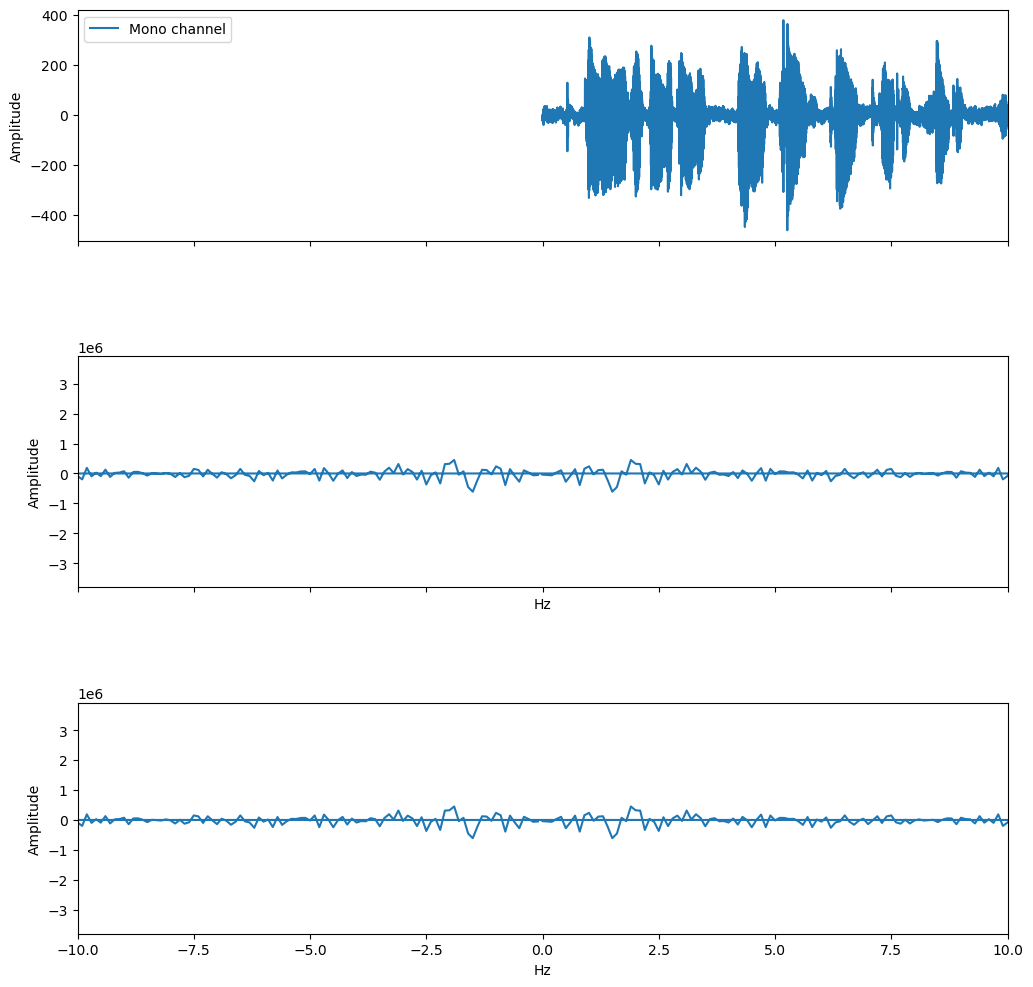

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from IPython.display import Audio, display, clear_output
import sounddevice as sd

# Parámetros de grabación en tiempo real
duration = 10  # Duración de la grabación en segundos
sample_rate = 44100  # Tasa de muestreo en Hz

# Función para grabar audio en tiempo real
def record_audio(duration, sample_rate):
    print("Grabando audio... Presiona Ctrl+C para detener.")
    try:
        audio = sd.rec(int(duration * sample_rate), sample_rate, channels=1, dtype=np.int16)
        sd.wait()
        print("Grabación finalizada.")
        return sample_rate, audio.flatten()
    except KeyboardInterrupt:
        print("Grabación interrumpida.")
        sd.stop()
        sd.flush()
        return None, None

# Grabar audio en tiempo real
samplerate, audio = record_audio(duration, sample_rate)

if samplerate is not None and audio is not None:
    # Reproducir audio en tiempo real
    display(Audio(audio, rate=samplerate))

    # Calcular la duración del audio grabado
    duration = audio.shape[0] / samplerate

    # Crear una figura con subtramas para separar las gráficas
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    
    # Graficar la forma de onda del audio grabado
    time = np.linspace(0., duration, audio.shape[0])
    ax1.plot(time, audio, label="Mono channel")
    ax1.legend()
    ax1.set_ylabel("Amplitude")
    
    # Realizar el análisis de frecuencia y mostrar el espectro de frecuencia
    time = np.linspace(0, duration, audio.size)
    W = fftfreq(audio.size, d=time[1] - time[0])
    f_audio = fft(audio)

    ax2.plot(W, f_audio)
    ax2.set_xlabel("Hz")
    ax2.set_xlim(-10, 10)
    ax2.set_ylabel("Amplitude")
    
    # (Aquí puedes agregar el código de procesamiento y filtrado si lo deseas)

    # Mostrar el resultado del análisis de frecuencia
    ax3.plot(W, f_audio)
    ax3.set_xlabel("Hz")
    ax3.set_xlim(-10, 10)
    ax3.set_ylabel("Amplitude")
    
    # Ajustar el espaciado vertical entre las subtramas
    plt.subplots_adjust(hspace=0.5)
    
    # Mostrar las gráficas
    plt.show()
else:
    print("No se grabó ningún audio.")


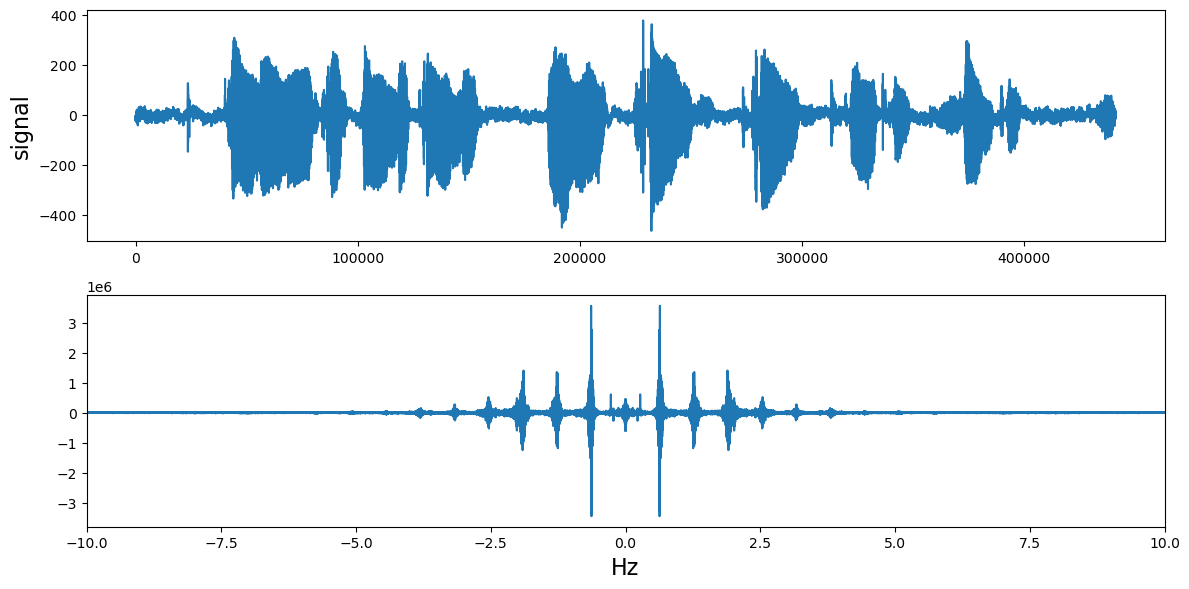

In [34]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
%matplotlib inline
import matplotlib.pyplot as plt

time   = np.linspace(0,10,2000)  #vector de tiempos linealmente espaciado donde se muestrea la señal. frecuencia de muestreo.
W = fftfreq(audio.size, d=time[1]-time[0]) #Frecuencia de muestreo o distancia de muestreo.  restar los 2 primero elementos de time para ver cuánto están espaciados los puntos.
f_audio = fft(audio)   #señal transfromada por Fourier.

# plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.plot(audio)
ax1.set_ylabel('signal',fontsize=16)

ax2.plot(W,f_audio)
ax2.set_xlabel('Hz',fontsize=16)
ax2.set_xlim(-10, 10)
fig.tight_layout()
plt.show()

#el gráfico muestra un comportamiento cíclico mediante el módulo por eso el gráfico es simétrico respecto al origen.

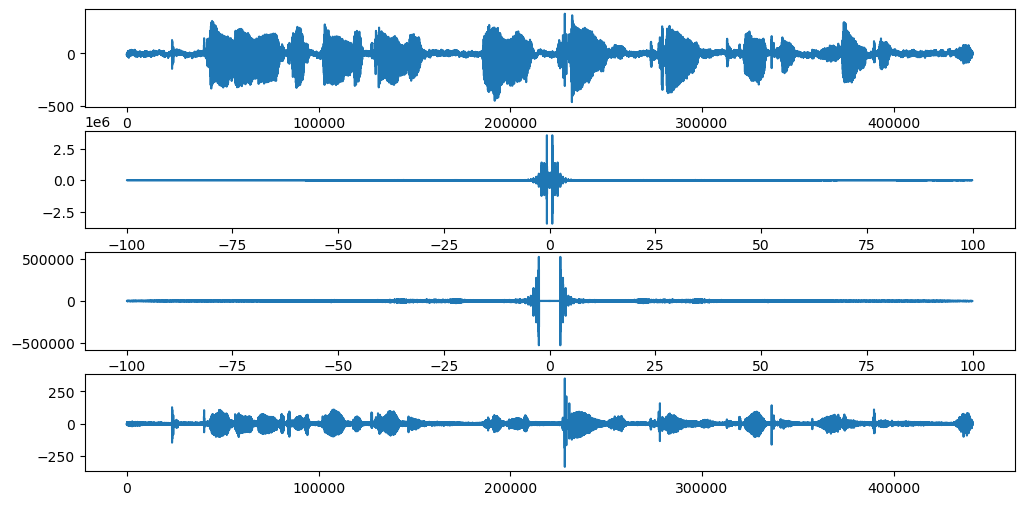

In [37]:
cut_f_audio = f_audio.copy()  #array que copia la señal de Fourier anterior.
# remuevo del vector todas las señales inferiores a 2.5 Hz
cut_f_audio[(-2.5<W)*(W<2.5)] = 0  #condición: W va a tener tantos elementos como f_audio. vector booleano, devuelve 0 en las posiciones en donde se cumple esa condición.
#donde se cumple la condición los puntos se remueven haciendose 0.
# IFFT para obtener la nueva señal en el dominio del tiempo.
cut_audio = ifft(cut_f_audio)

# plots para graficar.
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(hspace=0.25)

ax1 = fig.add_subplot(411)
ax1.plot(audio)

ax2 = fig.add_subplot(412)
ax2.plot(W,f_audio)

ax3 = fig.add_subplot(413)
ax3.plot(W,cut_f_audio)

ax4 = fig.add_subplot(414)
ax4.plot(cut_audio)

plt.show()

#Deja pasar las frecuencias altas y elimina las bajas.

In [38]:
from IPython.display import Audio

# player audio mono
Audio(cut_audio,rate=samplerate)
